<a href="https://colab.research.google.com/github/rushi-k12/Image-Recognition/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the CIFAR-10 dataset
dataset, info = tfds.load('cifar10', with_info=True, as_supervised=True)

# Take a small sample to inspect
sample_dataset = dataset['train'].take(5)

# Define the preprocessing function
def preprocess(image, label):
    # Resize the image to the desired dimensions
    image = tf.image.resize(image, (224, 224))
    # Normalize the image
    image = image / 255.0
    return image, label

# Apply the preprocessing function to the sample dataset
sample_dataset = sample_dataset.map(preprocess)

# Execute the sample dataset to see the preprocessed images
for image, label in sample_dataset:
    print(f"Preprocessed image shape: {image.shape}, Label: {label.numpy()}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete7MULSD/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete7MULSD/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Preprocessed image shape: (224, 224, 3), Label: 7
Preprocessed image shape: (224, 224, 3), Label: 8
Preprocessed image shape: (224, 224, 3), Label: 4
Preprocessed image shape: (224, 224, 3), Label: 4
Preprocessed image shape: (224, 224, 3), Label: 6


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Preprocess the images (normalize and resize)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Define the base model (pretrained VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
base_model.trainable = False

# Create the model architecture by adding a classification head on top of the base model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))


Epoch 1/2
1563/1563 [==============================] - 725s 463ms/step - loss: 1.4855 - accuracy: 0.4792 - val_loss: 1.2771 - val_accuracy: 0.5532
Epoch 2/2
1515/1563 [============================>.] - ETA: 17s - loss: 1.3002 - accuracy: 0.5448

In [21]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

# Evaluate model performance on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict class labels for test dataset
predictions = np.argmax(model.predict(test_images), axis=-1)

# Generate classification report
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(classification_report(test_labels, predictions, target_names=class_names))


313/313 [==============================] - 123s 392ms/step - loss: 1.2380 - accuracy: 0.5630
Test Loss: 1.2380484342575073
Test Accuracy: 0.5630000233650208
313/313 [==============================] - 116s 369ms/step
              precision    recall  f1-score   support

    airplane       0.59      0.69      0.63      1000
  automobile       0.64      0.60      0.62      1000
        bird       0.53      0.42      0.47      1000
         cat       0.41      0.42      0.42      1000
        deer       0.71      0.30      0.42      1000
         dog       0.59      0.47      0.52      1000
        frog       0.48      0.77      0.59      1000
       horse       0.58      0.67      0.62      1000
        ship       0.70      0.65      0.67      1000
       truck       0.54      0.65      0.59      1000

    accuracy                           0.56     10000
   macro avg       0.58      0.56      0.56     10000
weighted avg       0.58      0.56      0.56     10000



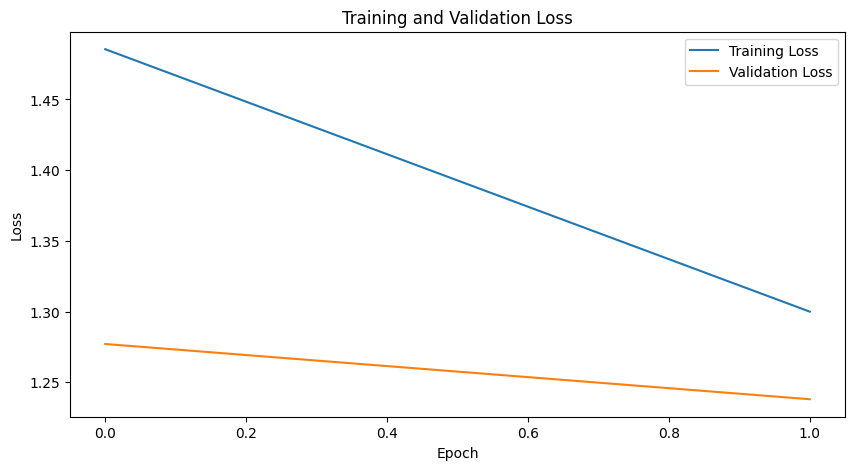

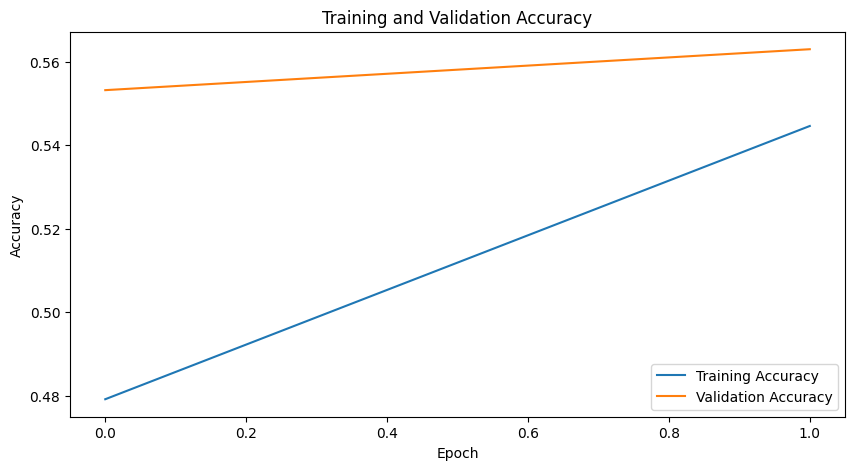

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
